<a href="https://colab.research.google.com/github/HanaHirose/ML_Self_Study/blob/main/ML_Regression_handwritten_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning: Logistic Regression

## handwritten character classification

Use data of "1", "3", "7" from sklearn and try to classify them by logistic regression.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, pi


from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression # module for logistic regression
from sklearn.model_selection import train_test_split # module for splitting data into the one for training and for test
from sklearn.preprocessing import StandardScaler # for pre-process. making data as average 0 and variance 1


In [38]:
# input data
digits = load_digits()


# dependent variable (target variable) y
label = digits['target']
y = label[(label==1)| (label==3)| (label==7)]
print(f"y: {y}")

y: [1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1 1 7 3 1 7 3 1 3 1 7 3 1 3 1 7
 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1 1 7 3 1 7 3 1 3 1 7 3 1 3
 1 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1 1 7 3 1 7 3 1 3 1 7 3 1
 3 1 7 7 7 3 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1 1 7 3 1 7 3 1 3 1
 7 3 1 3 1 7 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1 1 7 3 1 7 3 1
 3 1 7 3 1 3 1 7 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1 1 7 3 1 7
 3 1 3 1 7 3 1 3 1 7 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1 1 7 3
 1 7 3 1 3 1 7 3 1 3 1 7 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1 1
 7 3 1 3 1 3 1 7 3 1 3 1 7 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3 3 1
 1 7 3 1 7 3 1 3 1 7 3 1 3 1 7 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3 7 3
 3 1 1 7 3 1 7 3 1 3 1 7 3 1 3 1 7 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1 3 3
 7 3 3 1 1 7 3 1 7 3 1 3 1 7 3 1 3 1 7 7 7 1 3 7 1 3 7 1 3 7 1 7 7 3 1 7 1
 3 3 7 3 3 1 1 7 3 1 7 3 1 3 1 7 3 1 3 1 7 7 7 1 3 7 1 3 1 3 7 1 7 7 3 1 7
 1 3 3 7 3 3 1 1 7 3 1

In [39]:
# independent variable (features) X
X = digits['images']
X = X[(label==1)| (label==3)| (label==7)]

# shape from numpy gives tuple of the data size
print(X.shape)



(544, 8, 8)


## Examples of features and labels
handwritten charactors of 1, 3, 7

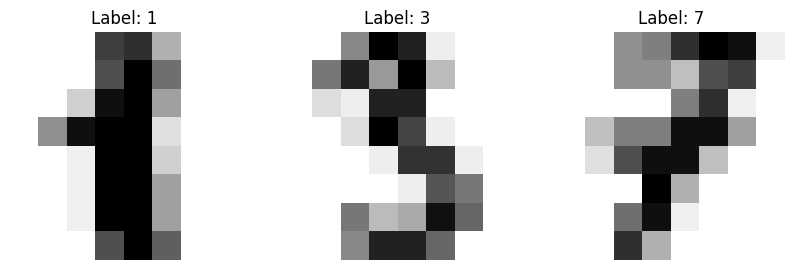

In [44]:
selected_labels =[1,3,7]

fig, axes = plt.subplots(1, len(selected_labels), figsize=(10,5))
for i, each_label in enumerate(selected_labels):
  index = np.where(y == each_label)[0][0]
  image = X[index]

  ax = axes[i]
  ax.imshow(image, cmap =plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f'Label: {each_label}')
  ax.axis('off')

plt.show()

In [35]:
# Reshape the data from (544, 8, 8) to (544, 64) so that you can treat it as vectors.
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
print(X.shape)

(544, 64)


In [14]:
# Standard the features X

scaler = StandardScaler() # Create an Instance

scaler.fit(X) # The mean and standard deviation for each features in X are calculated and stored in the 'scaler' instance

X_scaled = scaler.transform(X) #Apply teh standardization transformation using mean and standard deviation in 'scale'

print(X)
print(X_scaled)

[[ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  7. ...  9.  0.  0.]
 [ 0.  0.  7. ...  0.  0.  0.]
 ...
 [ 0.  0.  6. ...  0.  0.  0.]
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]]
[[ 0.         -0.34845297 -1.2147425  ...  0.70034066 -0.40362717
  -0.21353118]
 [ 0.         -0.34845297  0.38309496 ...  0.53397152 -0.40362717
  -0.21353118]
 [ 0.         -0.34845297  0.38309496 ... -0.96335068 -0.40362717
  -0.21353118]
 ...
 [ 0.         -0.34845297  0.15483246 ... -0.96335068 -0.40362717
  -0.21353118]
 [ 0.         -0.34845297 -0.52995502 ... -0.96335068 -0.40362717
  -0.21353118]
 [ 0.          0.91526981  1.06788244 ... -0.96335068 -0.40362717
  -0.21353118]]


In [24]:
# Split the dataset into training data and test data in an 80 : 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(y_train)

# Create "Multinomial (3 classes in this case) Logistic Regression"
# Note that the fitting function is linear about the weights (3 weights) even though it's not linear about x0, x1, ... xn
classifier = LogisticRegression(fit_intercept = True, max_iter=1500) # Didn't work with the default iteration number: 1000

# Fitting
classifier.fit(X_train, y_train)

# Evaluate teh predictions on the test data
y_predict = classifier.predict(X_test)

print(classifier)

[1 3 3 7 3 3 3 3 7 7 3 3 7 1 7 3 1 7 3 7 1 7 3 3 1 7 3 3 1 1 3 7 3 1 1 3 7
 3 7 3 7 7 1 1 7 1 7 7 7 1 7 1 3 3 7 7 1 3 3 7 7 3 3 1 3 3 1 3 1 3 3 7 7 3
 3 1 7 3 1 1 7 3 1 1 7 1 7 1 1 3 7 1 7 7 3 3 1 7 3 1 1 7 7 3 1 3 1 7 7 7 3
 7 3 3 7 7 1 1 1 1 1 3 1 1 1 3 3 3 3 3 3 7 3 3 7 1 1 1 7 7 7 7 1 7 1 3 3 7
 1 1 3 7 3 3 1 1 7 3 3 1 1 7 1 3 3 3 3 7 3 1 3 1 3 3 7 1 1 3 3 1 1 7 1 1 1
 3 7 7 3 3 3 3 7 7 3 3 3 1 1 1 1 1 3 7 1 1 7 3 3 3 7 3 7 1 7 7 1 7 7 1 1 7
 1 1 1 1 3 1 7 1 7 7 1 3 7 3 7 7 1 1 3 3 7 7 7 3 3 3 3 1 3 7 3 3 7 1 7 7 7
 7 1 3 1 3 1 1 7 1 3 1 7 7 3 1 1 3 1 1 7 7 7 7 7 1 7 3 1 3 1 7 7 7 3 7 3 1
 1 3 3 1 3 7 3 1 3 7 3 3 7 1 7 1 1 3 1 7 7 1 7 7 7 1 7 1 1 1 1 7 1 3 3 7 1
 1 3 1 1 7 7 7 3 3 1 3 3 1 7 7 1 1 3 1 7 3 1 3 3 7 1 1 7 1 3 3 1 7 1 1 7 3
 7 3 7 7 1 3 7 1 3 1 3 1 3 1 3 7 7 1 7 3 1 3 3 7 3 7 1 1 1 7 1 7 3 1 1 7 3
 7 7 1 7 7 3 1 1 1 3 1 3 7 1 1 1 7 1 3 3 7 3 3 3 3 7 3 1]
LogisticRegression(max_iter=1500)


In [25]:
# Show weight
# There is many training data in X and each is 64-dimentional vector. You get weight vector w (w_1, w_2, ... w_64) for each three classes.
print(f"Weight: {classifier.coef_}") # 64-dimensional vectors, classified into three classes.

# Show intercept
print(f"Intercept: {classifier.intercept_}") # Constant for each three classes.

Weight: [[ 0.00000000e+00 -2.13940831e-02 -7.77953868e-02 -1.05944124e-01
  -1.47202958e-01  1.80992177e-02 -2.83767101e-02 -1.70046140e-02
  -1.68582939e-07 -9.26510620e-02 -1.44832655e-01  2.99269227e-02
   2.15203049e-02 -4.24691669e-02 -4.09797662e-02 -1.44030314e-02
   2.62060730e-03  1.70144635e-02  5.18823100e-02  2.66467617e-01
   1.15567702e-01 -2.62997813e-02 -4.62569338e-02 -3.43036454e-03
   1.31033837e-03 -6.61235397e-03  8.75689492e-04  1.11983414e-01
   1.17034659e-03  3.77069210e-02 -2.89010234e-02  0.00000000e+00
   0.00000000e+00  1.36370770e-02  5.42964484e-02 -1.20604197e-02
  -5.24851329e-02 -5.20336636e-02 -6.99917991e-02  0.00000000e+00
   0.00000000e+00 -2.68258100e-02  7.68037879e-02  7.87857404e-02
   7.20882189e-02 -9.87052421e-02 -1.05938716e-01  0.00000000e+00
   0.00000000e+00 -7.98032500e-03 -2.90834591e-02  1.28111019e-02
   1.12663737e-01  4.32473693e-02 -7.21318225e-02  3.38224474e-02
   0.00000000e+00 -1.61829407e-02 -1.31059556e-01 -5.54906214e-02
  

## Resut
# Cheking the training data
Everything is classified correctly.

[1 3 3 7 3 3 3 3 7 7 3 3 7 1 7 3 1 7 3 7 1 7 3 3 1 7 3 3 1 1 3 7 3 1 1 3 7
 3 7 3 7 7 1 1 7 1 7 7 7 1 7 1 3 3 7 7 1 3 3 7 7 3 3 1 3 3 1 3 1 3 3 7 7 3
 3 1 7 3 1 1 7 3 1 1 7 1 7 1 1 3 7 1 7 7 3 3 1 7 3 1 1 7 7 3 1 3 1 7 7 7 3
 7 3 3 7 7 1 1 1 1 1 3 1 1 1 3 3 3 3 3 3 7 3 3 7 1 1 1 7 7 7 7 1 7 1 3 3 7
 1 1 3 7 3 3 1 1 7 3 3 1 1 7 1 3 3 3 3 7 3 1 3 1 3 3 7 1 1 3 3 1 1 7 1 1 1
 3 7 7 3 3 3 3 7 7 3 3 3 1 1 1 1 1 3 7 1 1 7 3 3 3 7 3 7 1 7 7 1 7 7 1 1 7
 1 1 1 1 3 1 7 1 7 7 1 3 7 3 7 7 1 1 3 3 7 7 7 3 3 3 3 1 3 7 3 3 7 1 7 7 7
 7 1 3 1 3 1 1 7 1 3 1 7 7 3 1 1 3 1 1 7 7 7 7 7 1 7 3 1 3 1 7 7 7 3 7 3 1
 1 3 3 1 3 7 3 1 3 7 3 3 7 1 7 1 1 3 1 7 7 1 7 7 7 1 7 1 1 1 1 7 1 3 3 7 1
 1 3 1 1 7 7 7 3 3 1 3 3 1 7 7 1 1 3 1 7 3 1 3 3 7 1 1 7 1 3 3 1 7 1 1 7 3
 7 3 7 7 1 3 7 1 3 1 3 1 3 1 3 7 7 1 7 3 1 3 3 7 3 7 1 1 1 7 1 7 3 1 1 7 3
 7 7 1 7 7 3 1 1 1 3 1 3 7 1 1 1 7 1 3 3 7 3 3 3 3 7 3 1]
(435,)


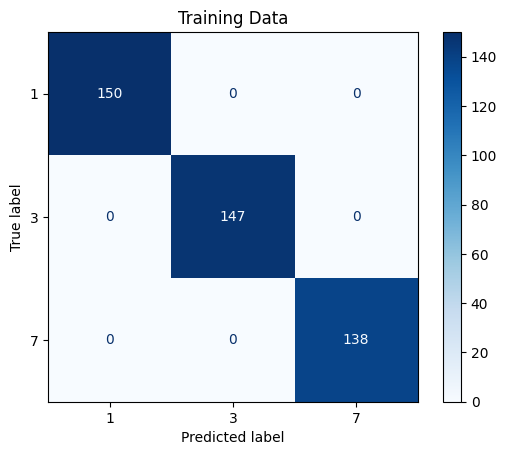

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classifier.predict(X_train))
print(y_train.shape)
cm_train = confusion_matrix(classifier.predict(X_train), y_train)

cm_plot = ConfusionMatrixDisplay(cm_train, display_labels =[1,3,7])
cm_plot.plot(cmap= plt.cm.Blues)
plt.title('Training Data')
plt.show()

## Checking Test Data to see the result of machine learning

Most data is classified in the correct classes but two data is classified into incorrect classes.

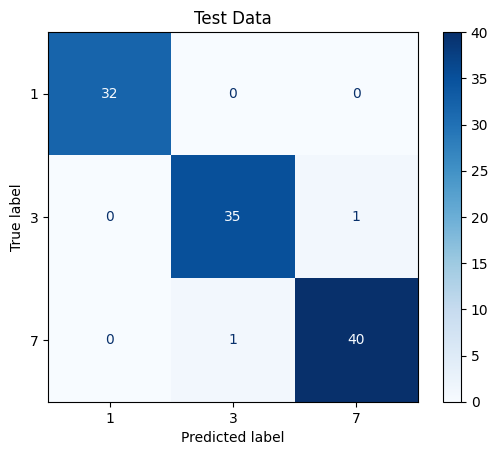

In [33]:
cm_test = confusion_matrix(classifier.predict(X_test), y_test)

cm_plot = ConfusionMatrixDisplay(cm_test, display_labels =[1,3,7])
cm_plot.plot(cmap= plt.cm.Blues)
plt.title('Test Data')
plt.show()